# Prediction Using Decision Tree Algorithm

### Sparks Foundation

## Task 3

In [21]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
#importing the dataset
import pandas as pd

file_id = '11Iq7YvbWZbt8VXjfm06brx66b10YiwK-'
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(download_link)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [23]:
df.drop('Id',axis=1,inplace=True)

In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Now will split the dataset to the dependent and independent variable 

X=df.drop('Species',axis=1)
y=df['Species']

In [31]:
 #will simply spilt the data into training and testing test set and build the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

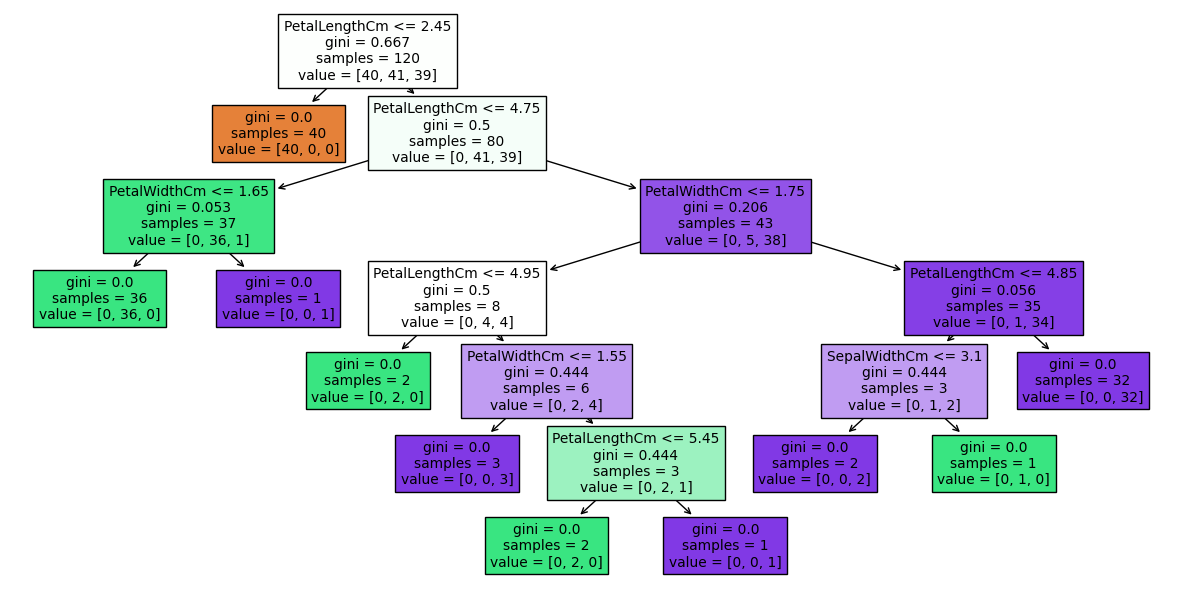

<Figure size 640x480 with 0 Axes>

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,feature_names=X.columns.to_list())
plt.show()
plt.savefig('image')

In [33]:
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_train,ytrain_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        41
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



In [36]:
print(classification_report(y_test,ytest_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [37]:
# Model Evaluation

train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 1.0, Testing Score 1.0


#### The model demonstrates excellent performance on both training and testing data with perfect scores (100%) across precision, recall, and F1-score for all classes. This suggests that the model has learned the patterns in the data well and can generalize effectively to new, unseen instances.

#### The high accuracy on both datasets (100%) indicates robustness and reliability in predicting the classes of Iris flowers.

### Conclusion:
#### With 100% accuracy on both training and testing data, this model appears to be well-suited for the Iris dataset, showcasing strong performance in classifying Iris flowers into their respective species.